In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier 

In [30]:
# Load the dataset
data = pd.read_csv('datasetnew.csv')

In [31]:
features = ['Species','Plant_Height', 'No._of_leaves_in_a_cluster',
            'Length_Width_LeafRatio','Average_angle_of_leaf_divergence_from_vertical'] 

data = data.drop('Leaf height', axis=1)
data = data.drop('Leaf Width', axis=1)


data.columns = features
# Explore the data
data.head()

,Species,Plant_Height,No._of_leaves_in_a_cluster,Length_Width_LeafRatio,Average_angle_of_leaf_divergence_from_vertical
0,Sansevieria trifasciata Hahnii,23.0,20.0,2.222222,37.21
1,Sansevieria trifasciata Hahnii,23.0,20.0,2.875000,22.00
2,Sansevieria trifasciata Hahnii,23.0,20.0,3.142857,15.73
3,Sansevieria trifasciata Hahnii,23.0,20.0,1.818182,29.45
4,Sansevieria trifasciata Hahnii,26.0,15.0,2.000000,41.12


In [32]:
import pandas as pd

def replace_missing_with_average(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include='number')
    
    # Calculate the average value of each column
    column_averages = numeric_data.mean()
    
    # Replace missing values with column averages
    data_filled = data.fillna(column_averages)
    
    return data_filled

# Replace missing values with column averages
data = replace_missing_with_average(data)

# Check for missing values after replacement
print(data.isnull().sum())

# Explore the data
print(data.head())




Species                                           0
Plant_Height                                      0
No._of_leaves_in_a_cluster                        0
Length_Width_LeafRatio                            0
Average_angle_of_leaf_divergence_from_vertical    0
dtype: int64
                          Species  Plant_Height  No._of_leaves_in_a_cluster  \
0  Sansevieria trifasciata Hahnii          23.0                        20.0   
1  Sansevieria trifasciata Hahnii          23.0                        20.0   
2  Sansevieria trifasciata Hahnii          23.0                        20.0   
3  Sansevieria trifasciata Hahnii          23.0                        20.0   
4  Sansevieria trifasciata Hahnii          26.0                        15.0   

   Length_Width_LeafRatio  Average_angle_of_leaf_divergence_from_vertical  
0                2.222222                                           37.21  
1                2.875000                                           22.00  
2                3.14285

In [33]:
features = data.drop('Species', axis=1)  # Drop the 'species' column (label)
labels = data['Species'].to_numpy()          # Select the 'species' column (label)

encoder = OneHotEncoder(sparse=False)
# Fit the encoder on the labels to learn the categories
encoder.fit(labels.reshape(-1, 1))  # Reshape labels if needed
# Transform the labels into a one-hot encoded NumPy array
labels_encoded = encoder.transform(labels.reshape(-1, 1))

In [34]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Normalize features
features_normalized = scaler.fit_transform(features)

In [35]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the range of folds
num_folds_candidates = [3,5,7,10]

# Define the logistic regression model
model = LogisticRegression()

# Dictionary to store mean scores for each number of folds
mean_scores = {}

# Convert one-hot encoded labels to 1D
labels_1d = np.argmax(labels_encoded, axis=1)

# Perform cross-validation with different numbers of folds
for num_folds in num_folds_candidates:
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, features_normalized, labels_1d, cv=kf, scoring='accuracy')
    mean_scores[num_folds] = np.mean(scores)

# Print mean scores for each number of folds
for num_folds, mean_score in mean_scores.items():
    print(f"Number of Folds: {num_folds}, Mean Accuracy: {mean_score}")

# Choose the number of folds that yields the best performance
best_num_folds = max(mean_scores, key=mean_scores.get)
print(f"\nBest Number of Folds: {best_num_folds} (Accuracy: {mean_scores[best_num_folds]})")


Number of Folds: 3, Mean Accuracy: 0.9682539682539683
Number of Folds: 5, Mean Accuracy: 0.9763076923076923
Number of Folds: 7, Mean Accuracy: 0.9761904761904763
Number of Folds: 10, Mean Accuracy: 0.9756410256410255

Best Number of Folds: 5 (Accuracy: 0.9763076923076923)


Developing a model that does better than a baseline
• Your goal at this stage is to achieve statistical power: that is, to develop a 
small model that is capable of beating a dumb baseline.
• Note that it is not always possible to achieve statistical power. If you cannot 
beat a random baseline after trying multiple reasonable architectures, it may 
be that the answer to the question you are asking is not present in the input 
data

In [36]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

# 3-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(features_normalized):
    print(f"Fold {fold}")
    train_features, test_features = features_normalized[train_index], features_normalized[test_index]
    train_labels, test_labels = labels_encoded[train_index], labels_encoded[test_index]
    
    print(f"Train size: {len(train_features)}, Test size: {len(test_features)}")
    fold += 1



Fold 1
Train size: 100, Test size: 26
Fold 2
Train size: 101, Test size: 25
Fold 3
Train size: 101, Test size: 25
Fold 4
Train size: 101, Test size: 25
Fold 5
Train size: 101, Test size: 25


Vectorization refers to the process of converting textual data into numerical vectors that machine learning models can understand. However, my dataset is numerical already.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

# Define a function to create the Keras model
def create_model(learning_rate=0.01, num_hidden_layers=1, input_layer_units=64, hidden_layer_units=32, l2_reg=0.01, batch_size=32):
    model = Sequential()
    model.add(Dense(input_layer_units, activation='relu', input_shape=train_features.shape[1:], kernel_regularizer=l2(l2_reg)))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(hidden_layer_units, activation='relu', kernel_regularizer=l2(l2_reg)))
    
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameter search space including regularization strength and batch size
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_hidden_layers': [1, 2, 3],
    'input_layer_units': [64, 128, 256],
    'hidden_layer_units': [32, 64, 128],
    'l2_reg': [0.001, 0.01, 0.1],  # Regularization strength
    'batch_size': [16, 32, 64]  # Batch size
}

# Perform grid search
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=10) 
gs.fit(train_features, train_labels)

# Get the best model and its parameters
best_model = gs.best_estimator_.model
best_params = gs.best_params_
accuracy = gs.best_score_ 

# Print results
print("Training Accuracy:", accuracy)
print("Best Params:", best_params)

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(test_features, test_labels, verbose=0)
print("Test accuracy with Hyperparameter Tuning:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)



C:\Users\DELL\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


5/5 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3243


Fold 1
Train size: 100, Test size: 26
Epoch 1/300
100/100 [==============================] - 2s 5ms/step - loss: 0.5686 - accuracy: 0.9500 - mae: 0.2327 - val_loss: 0.3400 - val_accuracy: 0.9615 - val_mae: 0.1300
Epoch 2/300
100/100 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9800 - mae: 0.0646 - val_loss: 0.2177 - val_accuracy: 0.9615 - val_mae: 0.0623
Epoch 3/300
100/100 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9800 - mae: 0.0356 - val_loss: 0.1838 - val_accuracy: 0.9615 - val_mae: 0.0493
Epoch 4/300
100/100 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9800 - mae: 0.0374 - val_loss: 0.1877 - val_accuracy: 0.9615 - val_mae: 0.0423
Epoch 5/300
100/100 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9800 - mae: 0.0293 - val_loss: 0.1697 - val_accuracy: 0.9615 - val_mae: 0.0382
Epoch 6/300
100/100 [==============================] - 0s 2ms/step - loss: 0.1378 - acc

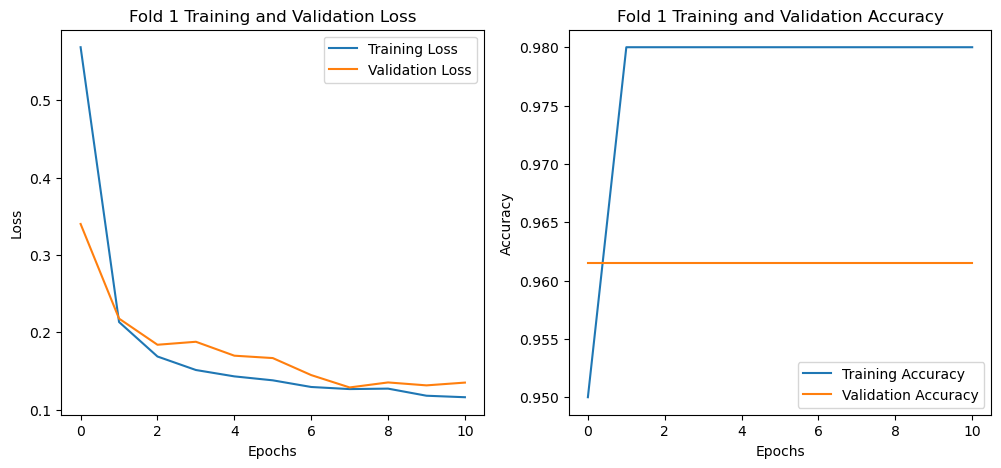

Fold 2
Train size: 101, Test size: 25
Epoch 1/300
101/101 [==============================] - 1s 5ms/step - loss: 0.7032 - accuracy: 0.8317 - mae: 0.2825 - val_loss: 0.2599 - val_accuracy: 1.0000 - val_mae: 0.1074
Epoch 2/300
101/101 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.9703 - mae: 0.0859 - val_loss: 0.1310 - val_accuracy: 1.0000 - val_mae: 0.0354
Epoch 3/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9703 - mae: 0.0509 - val_loss: 0.1118 - val_accuracy: 1.0000 - val_mae: 0.0259
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9703 - mae: 0.0431 - val_loss: 0.0951 - val_accuracy: 1.0000 - val_mae: 0.0184
Epoch 5/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9703 - mae: 0.0370 - val_loss: 0.1093 - val_accuracy: 1.0000 - val_mae: 0.0282
Epoch 6/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1496 - acc

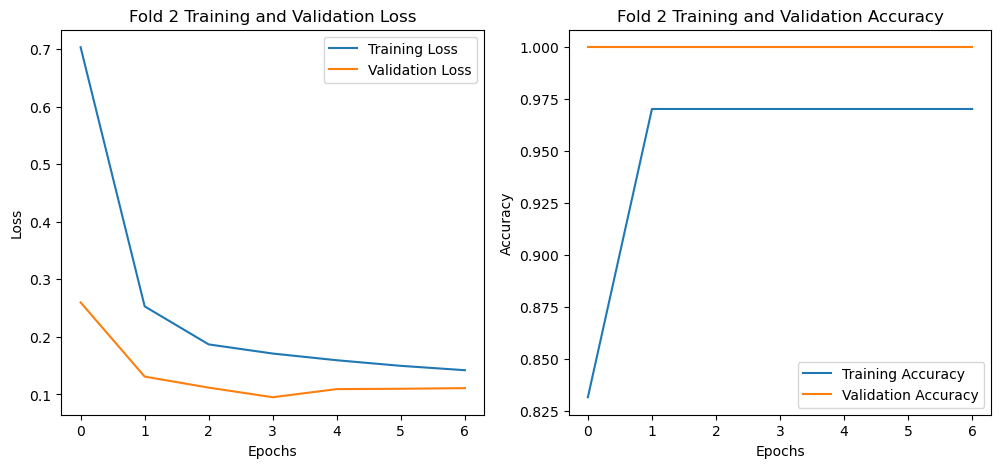

Fold 3
Train size: 101, Test size: 25
Epoch 1/300
101/101 [==============================] - 1s 4ms/step - loss: 0.6413 - accuracy: 0.8911 - mae: 0.2616 - val_loss: 0.2101 - val_accuracy: 1.0000 - val_mae: 0.0762
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9703 - mae: 0.0763 - val_loss: 0.1320 - val_accuracy: 1.0000 - val_mae: 0.0335
Epoch 3/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9703 - mae: 0.0461 - val_loss: 0.1078 - val_accuracy: 1.0000 - val_mae: 0.0224
Epoch 4/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9703 - mae: 0.0411 - val_loss: 0.0982 - val_accuracy: 1.0000 - val_mae: 0.0191
Epoch 5/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9703 - mae: 0.0421 - val_loss: 0.0883 - val_accuracy: 1.0000 - val_mae: 0.0160
Epoch 6/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1453 - acc

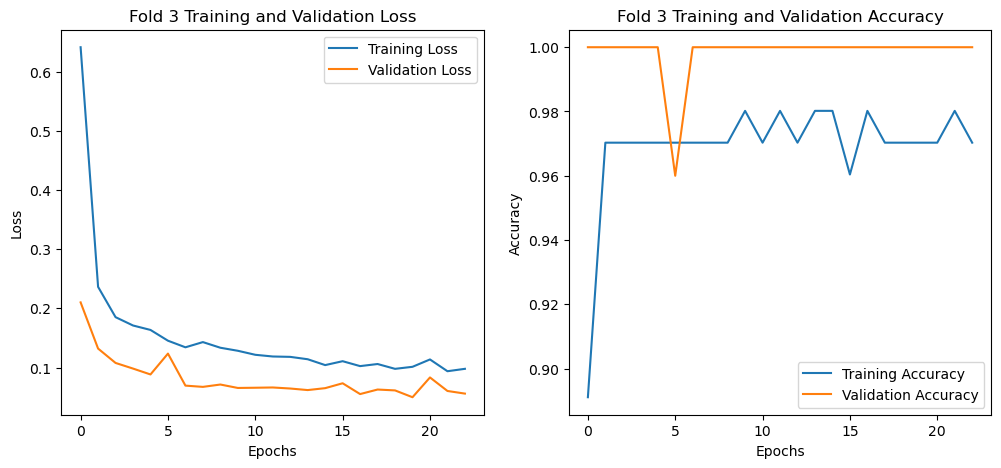

Fold 4
Train size: 101, Test size: 25
Epoch 1/300
101/101 [==============================] - 1s 3ms/step - loss: 0.6157 - accuracy: 0.8812 - mae: 0.2474 - val_loss: 0.3757 - val_accuracy: 0.9600 - val_mae: 0.1443
Epoch 2/300
101/101 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9802 - mae: 0.0662 - val_loss: 0.2673 - val_accuracy: 0.9600 - val_mae: 0.0659
Epoch 3/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9802 - mae: 0.0335 - val_loss: 0.2328 - val_accuracy: 0.9600 - val_mae: 0.0673
Epoch 4/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9802 - mae: 0.0279 - val_loss: 0.2192 - val_accuracy: 0.9600 - val_mae: 0.0533
Epoch 5/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9703 - mae: 0.0258 - val_loss: 0.2248 - val_accuracy: 0.9200 - val_mae: 0.0774
Epoch 6/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1221 - acc

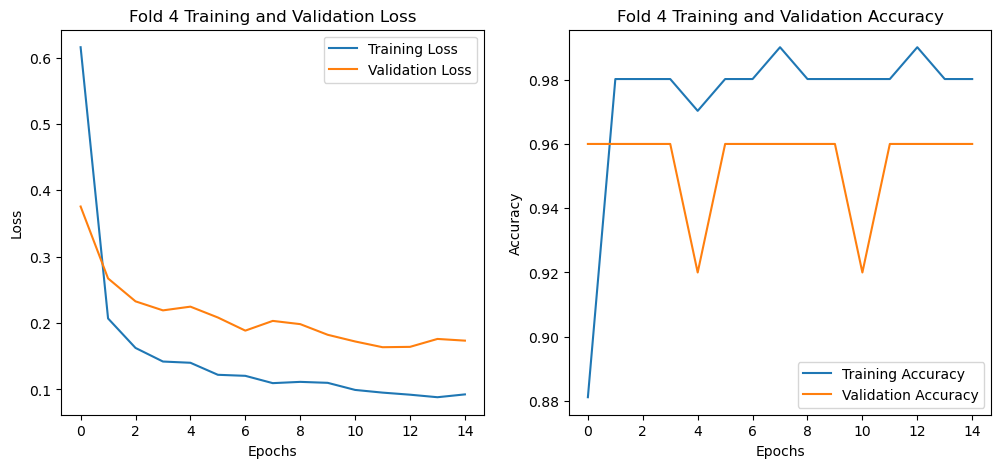

Fold 5
Train size: 101, Test size: 25
Epoch 1/300
101/101 [==============================] - 1s 4ms/step - loss: 0.6250 - accuracy: 0.9010 - mae: 0.2528 - val_loss: 0.3448 - val_accuracy: 0.9600 - val_mae: 0.1353
Epoch 2/300
101/101 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9802 - mae: 0.0741 - val_loss: 0.2353 - val_accuracy: 0.9600 - val_mae: 0.0519
Epoch 3/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9802 - mae: 0.0385 - val_loss: 0.2065 - val_accuracy: 0.9600 - val_mae: 0.0423
Epoch 4/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9802 - mae: 0.0357 - val_loss: 0.2177 - val_accuracy: 0.9600 - val_mae: 0.0355
Epoch 5/300
101/101 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9802 - mae: 0.0252 - val_loss: 0.1929 - val_accuracy: 0.9600 - val_mae: 0.0359
Epoch 6/300
101/101 [==============================] - 0s 1ms/step - loss: 0.1250 - acc

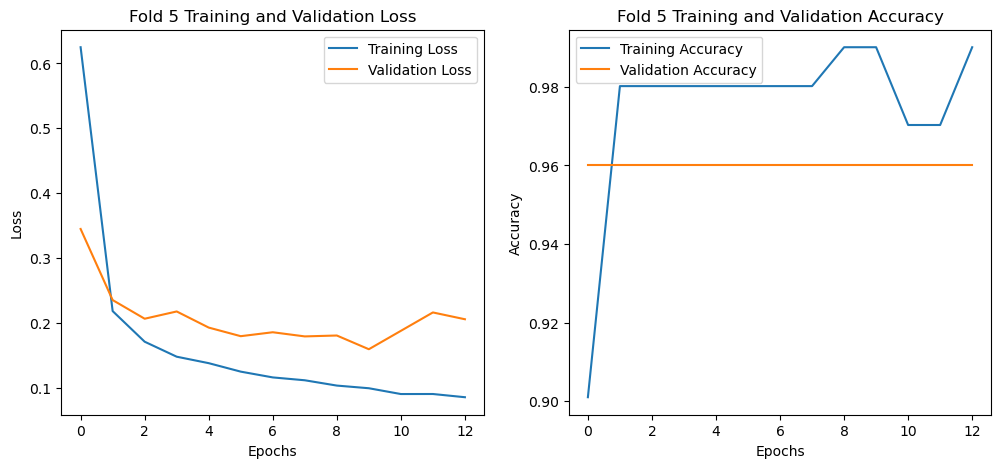

In [37]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Define EarlyStopping callback with a patience of 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Function to calculate various metrics
def calculate_metrics(y_true, y_pred, average='macro'):
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    precision = precision_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), average=average)
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), average=average)
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), average=average)
    roc_auc = roc_auc_score(y_true, y_pred, average=average, multi_class='ovo')
    return accuracy, precision, recall, f1, roc_auc

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the results of each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
fold_roc_aucs = []

fold = 1
for train_index, test_index in kf.split(features_normalized):
    print(f"Fold {fold}")
    train_features, test_features = features_normalized[train_index], features_normalized[test_index]
    train_labels, test_labels = labels_encoded[train_index], labels_encoded[test_index]
    
    print(f"Train size: {len(train_features)}, Test size: {len(test_features)}")
    
    # Define the Keras model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(train_features.shape[1],)))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(labels_encoded.shape[1], activation='softmax'))  # Changed to 'softmax' for multi-class classification
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", "mae"])
    
    # Train the model with validation data
    history = model.fit(train_features, train_labels, epochs=300, batch_size=1,
                        validation_data=(test_features, test_labels), callbacks=[early_stopping])
    
    # Evaluate the model on the test set
    test_predictions = model.predict(test_features)
    accuracy, precision, recall, f1, roc_auc = calculate_metrics(test_labels, test_predictions)
    
    # Store the metrics
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)
    fold_roc_aucs.append(roc_auc)
    
    print(f"Fold {fold} Test Accuracy: {accuracy:.4f}")
    print(f"Fold {fold} Test Precision: {precision:.4f}")
    print(f"Fold {fold} Test Recall: {recall:.4f}")
    print(f"Fold {fold} Test F1 Score: {f1:.4f}")
    print(f"Fold {fold} Test ROC AUC: {roc_auc:.4f}")
    
    # Plot training and validation loss and accuracy
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()
    
    fold += 1

In [38]:
# Print average metrics across folds
print(f"\nAverage Test Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Average Test Precision: {np.mean(fold_precisions):.4f}")
print(f"Average Test Recall: {np.mean(fold_recalls):.4f}")
print(f"Average Test F1 Score: {np.mean(fold_f1s):.4f}")
print(f"Average Test ROC AUC: {np.mean(fold_roc_aucs):.4f}")

# Train the final model on the entire dataset
final_model = models.Sequential()
final_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(features_normalized.shape[1],)))
final_model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
final_model.add(layers.Dense(labels_encoded.shape[1], activation='softmax'))  # Changed to 'softmax' for multi-class classification

# Compile the model
final_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", "mae"])

# Train the model on the entire dataset with a validation split
history = final_model.fit(features_normalized, labels_encoded, epochs=300, batch_size=1, 
                          validation_split=0.2, callbacks=[early_stopping])

# Save the final model
final_model.save('final_model.h5')
print("Final model saved to 'final_model.h5'")



Average Test Accuracy: 0.9763
Average Test Precision: 0.9806
Average Test Recall: 0.9739
Average Test F1 Score: 0.9757
Average Test ROC AUC: 0.9972
Epoch 1/300
100/100 [==============================] - 1s 3ms/step - loss: 0.6222 - accuracy: 0.8800 - mae: 0.2527 - val_loss: 0.4261 - val_accuracy: 1.0000 - val_mae: 0.1862
Epoch 2/300
100/100 [==============================] - 0s 1ms/step - loss: 0.2236 - accuracy: 0.9700 - mae: 0.0736 - val_loss: 0.2758 - val_accuracy: 1.0000 - val_mae: 0.1120
Epoch 3/300
100/100 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9700 - mae: 0.0431 - val_loss: 0.2336 - val_accuracy: 1.0000 - val_mae: 0.0910
Epoch 4/300
100/100 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.9700 - mae: 0.0386 - val_loss: 0.2022 - val_accuracy: 1.0000 - val_mae: 0.0770
Epoch 5/300
100/100 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9700 - mae: 0.0350 - val_loss: 0.2372 - val_accuracy: 0

In [41]:
# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, np.argmax(y_train, axis=1))

# Get the coefficients (weights) of the logistic regression model
feature_importance_scores = logistic_model.coef_[0]

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features_data.columns, 'Importance Score': feature_importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance Score', ascending=False)

# Print the top N most important features
top_n = 5  # Adjust this value based on how many top features you want to see
print(f"Top {top_n} Most Important Features:")
print(feature_importance_df.head(top_n))


Top 5 Most Important Features:
                                          Feature  Importance Score
0                                    Plant_Height          1.033627
2                          Length_Width_LeafRatio          0.279137
3  Average_angle_of_leaf_divergence_from_vertical         -0.884738
1                      No._of_leaves_in_a_cluster         -0.996985


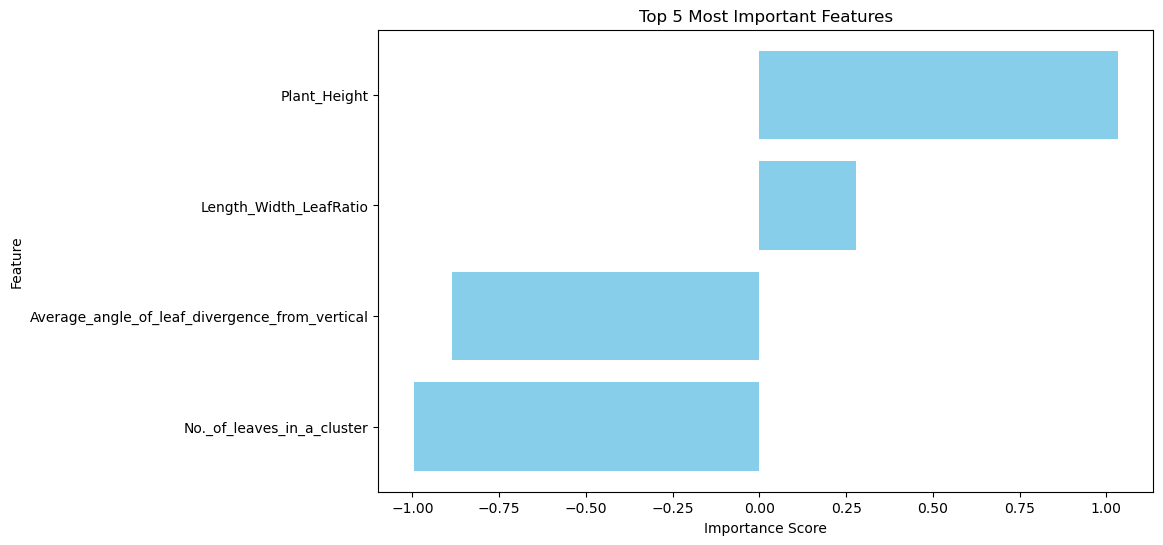

In [42]:
import matplotlib.pyplot as plt

# Define the number of top features to plot
top_n = 5

# Get the top N most important features
top_features = feature_importance_df.head(top_n)

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance Score'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features on top
plt.show()
